In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Analyzing the data

In [6]:
stores_train = pd.read_csv('data/stores_train.csv')

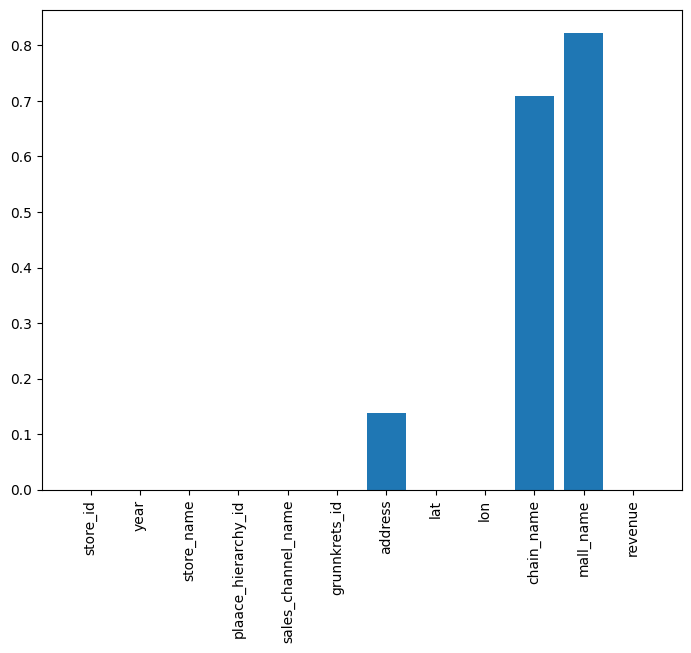

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
horisontal = stores_train.isna().mean().index
vertical = stores_train.isna().mean().values

plt.xticks(rotation='vertical')

ax.bar(horisontal,vertical)
plt.show()

#Mabye smart to use rows with no NaN values?

In [8]:
sales_channel_names = list(dict.fromkeys(stores_train.sales_channel_name.values))
#print(sales_channel_names)
instances = {i:list(stores_train.sales_channel_name.values).count(i) for i in stores_train.sales_channel_name.values}
#print(instances)
#print(stores_train.revenue)

revenue_per_channel_name = dict.fromkeys(sales_channel_names, 0)

for sales_channel_name in sales_channel_names: #Find revenue for every channel name
    for i in range(len(stores_train.revenue)):
        if stores_train.sales_channel_name.values[i] == sales_channel_name:
            revenue_per_channel_name[sales_channel_name] += stores_train.revenue[i]

#print(revenue_per_channel_name)

mean_revenue_per_channel_name = dict.fromkeys(sales_channel_names, 0)

for key in revenue_per_channel_name.keys(): #Find mean revenue for every channel name
    mean_revenue_per_channel_name[key] = revenue_per_channel_name[key] / instances[key]

#print(mean_revenue_per_channel_name)



{'Hamburger restaurants': 10.341043478260872, 'Sushi and wok restaurants': 7.033237113402063, 'Thai restaurants': 4.005233333333334, 'Chinese restaurants': 3.7655454545454545, 'Pizza restaurants': 5.4326742857142865, 'Eateries': 7.2853484848484875, 'Restaurants': 8.286564999999998, 'Restaurants and cafes': 7.799164473684208, 'Belongs to dining': 3.2798439716312084, 'Hotels with restaurants': 4.710399159663868, 'Fast food': 3.9704572649572625, 'Bakeries': 4.4238, 'Bakery shop': 5.467893617021278, 'Coffee shops': 4.165760869565217, 'Cafes': 4.970258620689654, 'Bars': 2.9876, 'Pubs': 5.9606068376068375, 'Sandwich shops': 5.609000000000001, 'Ice cream and smoothie shops': 2.0205, 'Hardware store': 9.195072289156629, 'Paint dealers': 8.505560975609754, 'Kitchen design stores': 23.881884615384614, 'Plumbing stores': 9.462770270270267, 'Tile stores': 25.012684210526313, 'Construction stores': 12.817613402061847, 'Interior design shops': 4.346, 'Gas stations': 16.47803768115942, 'Car accessori

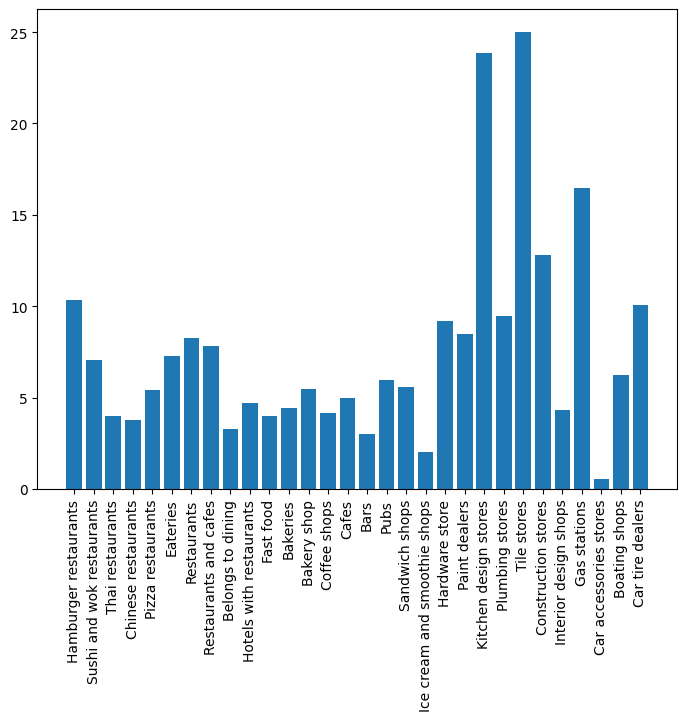

In [9]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])

#print(len(list(mean_revenue_per_channel_name.keys())))

vertical = list(mean_revenue_per_channel_name.values())[:30]
horisontal = list(mean_revenue_per_channel_name.keys())[:30]

#print(horisontal)
#print(vertical)

plt.xticks(rotation='vertical')

ax.bar(horisontal,vertical)
plt.show()